In [118]:
import pandas as pd # pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
# from sklearn import impute
from  scipy.stats import skew, kurtosis, shapiro
import datetime
import time

plt.rc('axes', linewidth=2)
plt.rc('axes', labelsize= 16)
plt.rc('axes',titlesize = 18)
plt.rc('legend',fontsize=14)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('figure',figsize=(10,8),titleweight ='bold')
# plt.rc('lines',linewidth = 2)

def figure_layout(figsize=(10,8),titel="",xlabel="",ylabel="",fontsize_titel=18,fontsize_axis=16,fontsize_legend=14,fontsize_ticks=16):
    plt.figure(figsize=figsize)
    ax1 = plt.gca()
    plt.rc('legend',fontsize=fontsize_legend)
    plt.title(titel, fontsize=fontsize_titel, fontweight = 'bold')
    plt.grid(True)
    plt.xlabel(xlabel, fontsize=fontsize_axis)
    plt.ylabel(ylabel, fontsize=fontsize_axis)
    for tick in ax1.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize_ticks)
    #         tick.label1.set_fontweight('bold')
    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize_ticks)
    #     tick.label1.set_fontweight('bold')
    
    return ax1


In [2]:
attributes = pd.read_csv("D:\Onedrive\Leuven\Final project\data\\addinfo.csv",index_col = "meter_id")
print(attributes.shape)
amountMeters = attributes.shape[0]
attributes.head(100)

(2143, 23)


,dwelling_type,num_occupants,num_bedrooms,heating_fuel,hot_water_fuel,boiler_age,loft_insulation,wall_insulation,heating_temperature,efficient_lighting_percentage,...,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
meter_id,,,,,,,,,,,,,,,,,,,,,
0x02b7418b821b2edeeb2baa23ba1580566b4b0e43,semi_detached_house,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41,terraced_house,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xdd45ab28a7a40eadc04607d6da42e5ad923b1339,semi_detached_house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x2b538a5ebfc3780aef25227267063cb6410d943b,detached_house,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xee032ed498c9e99a4c65e0f39896fb30e513c6b7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xd33e5ad8e928a17e08384bea04c0d583edc77c2c,terraced_house,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xc053c89ca63bad876806ebd23e6cbcdf71b8b1a3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xcef4d8d3c2bde0565ceac3814cf8ef43a25b4963,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 2143 meters with additional information of at least one of the 23 attributes.

In [3]:
# It is possible to look to the month December where all series have data to investigate the effect of an attribute. 
for col in attributes.columns:
    total = amountMeters - attributes[col].isnull().sum()
    print("Attribute %s has %s filled places." % (col, total))


Attribute dwelling_type has 1702 filled places.
Attribute num_occupants has 74 filled places.
Attribute num_bedrooms has 1859 filled places.
Attribute heating_fuel has 78 filled places.
Attribute hot_water_fuel has 76 filled places.
Attribute boiler_age has 74 filled places.
Attribute loft_insulation has 75 filled places.
Attribute wall_insulation has 75 filled places.
Attribute heating_temperature has 74 filled places.
Attribute efficient_lighting_percentage has 73 filled places.
Attribute dishwasher has 76 filled places.
Attribute freezer has 70 filled places.
Attribute fridge_freezer has 70 filled places.
Attribute refrigerator has 73 filled places.
Attribute tumble_dryer has 76 filled places.
Attribute washing_machine has 76 filled places.
Attribute game_console has 72 filled places.
Attribute laptop has 70 filled places.
Attribute pc has 70 filled places.
Attribute router has 69 filled places.
Attribute set_top_box has 70 filled places.
Attribute tablet has 70 filled places.
Attri

In [4]:
attributes.loc[attributes.index[0],"dwelling_type"]

'semi_detached_house'

In [5]:
# Assessement of the type of house
for row in attributes.index:
    dwellingType = attributes.loc[row,"dwelling_type"]
    occupants = attributes.loc[row,"num_occupants"]
    bedrooms = attributes.loc[row,"num_bedrooms"]
    if not np.isnan(occupants):
        print("Dwelling type: %s"%dwellingType)
        print("#occupants: %s"%occupants)
        print("Number of bedrooms:%s\n"%bedrooms)

Dwelling type: detached_house
#occupants: 2.0
Number of bedrooms:4.0

Dwelling type: bungalow
#occupants: 2.0
Number of bedrooms:3.0

Dwelling type: semi_detached_house
#occupants: 2.0
Number of bedrooms:4.0

Dwelling type: semi_detached_house
#occupants: 2.0
Number of bedrooms:3.0

Dwelling type: detached_house
#occupants: 2.0
Number of bedrooms:4.0

Dwelling type: semi_detached_house
#occupants: 2.0
Number of bedrooms:3.0

Dwelling type: bungalow
#occupants: 4.0
Number of bedrooms:5.0

Dwelling type: flat
#occupants: 2.0
Number of bedrooms:1.0

Dwelling type: detached_house
#occupants: 2.0
Number of bedrooms:4.0

Dwelling type: terraced_house
#occupants: 2.0
Number of bedrooms:3.0

Dwelling type: detached_house
#occupants: 2.0
Number of bedrooms:4.0

Dwelling type: detached_house
#occupants: 2.0
Number of bedrooms:4.0

Dwelling type: flat
#occupants: 2.0
Number of bedrooms:1.0

Dwelling type: terraced_house
#occupants: 3.0
Number of bedrooms:3.0

Dwelling type: detached_house
#occupa

In [6]:
a = attributes.isnull().sum(axis=1)
full_names = a[a==0].index
attributes.loc[full_names[2]]

dwelling_type                    semi_detached_house
num_occupants                                      2
num_bedrooms                                       3
heating_fuel                                     gas
hot_water_fuel                                   gas
boiler_age                                       old
loft_insulation                                    y
wall_insulation                             y_cavity
heating_temperature                         18_to_20
efficient_lighting_percentage              75_to_100
dishwasher                                         1
freezer                                            0
fridge_freezer                                     1
refrigerator                                       1
tumble_dryer                                       1
washing_machine                                    1
game_console                                       0
laptop                                             1
pc                                            

In [7]:
print("Amount of meters with full household data: %s."%full_names.shape[0])

Amount of meters with full household data: 51.


# Correlation between consumption and household characteristics .

In [14]:
originalData = pd.read_csv("D:\Onedrive\Leuven\Final project\data\consumption.csv",index_col = "meter_id") 

In [15]:
originalData_T = originalData.transpose()
originalData_T.index = pd.to_datetime(originalData_T.index)

In [27]:
# Estimate the missing data based on previous and future observations
def estimated_mean_signal(test):
    # subsitude if necessary the first of january or the last day of december (general) then
    for col_ID in test.columns:
        missing_index = test.loc[pd.isna(test[col_ID]), :].index
        meanOfSerie = test[col_ID].mean()
        for date in missing_index:
            # if date.dayofyear == 1 or date.dayofyear == 365:
            if date.day == 1 or date.day == 31:
                estimation = meanOfSerie
                test.loc[date,col_ID] = estimation
    
    # subsitude the rest of the days
    for col_ID in test.columns:
        missing_index = test.loc[pd.isna(test[col_ID]), :].index
        for date in missing_index:
            n = 0
            next_measure_index = date + datetime.timedelta(days= 1)
            next_measure_value = test.loc[next_measure_index,col_ID]
            
            previous_measure_index = date + datetime.timedelta(days= -1)
            previous_measure_value = test.loc[previous_measure_index,col_ID]

            while np.isnan(next_measure_value) or np.isnan(previous_measure_value):
                n += 1
                            
                if np.isnan(next_measure_value) and np.isnan(previous_measure_value):

                    next_measure_index = date + datetime.timedelta(days= n + 1)
                    next_measure_value = test.loc[next_measure_index,col_ID]
                    previous_measure_index = date + datetime.timedelta(days= -1*(n + 1))
                    previous_measure_value = test.loc[next_measure_index,col_ID]
                
                elif np.isnan(next_measure_value):
                    next_measure_index = date + datetime.timedelta(days= n + 1)
                    next_measure_value = test.loc[next_measure_index,col_ID]

                elif np.isnan(previous_measure_value):
                    previous_measure_index = date + datetime.timedelta(days= -1*(n + 1))
                    previous_measure_value = test.loc[next_measure_index,col_ID]

                else:
                    raise Exception("Should have been excepted by one of the previous cases.")
                

            estimation = (next_measure_value + previous_measure_value)/2
            test.loc[date,col_ID] = estimation

In [44]:
originalDecember = originalData_T[originalData_T.index.month_name() == "December"]

In [48]:
originalDecember_NM = originalDecember.copy(deep=True)
originalDecember_NM.isnull().sum(axis=0).sum()

1265472

In [49]:
estimated_mean_signal(originalDecember_NM)
originalDecember_NM.to_csv("D:\Onedrive\Leuven\Final project\data\WrittenData\\originalDecember_no_missing.csv")


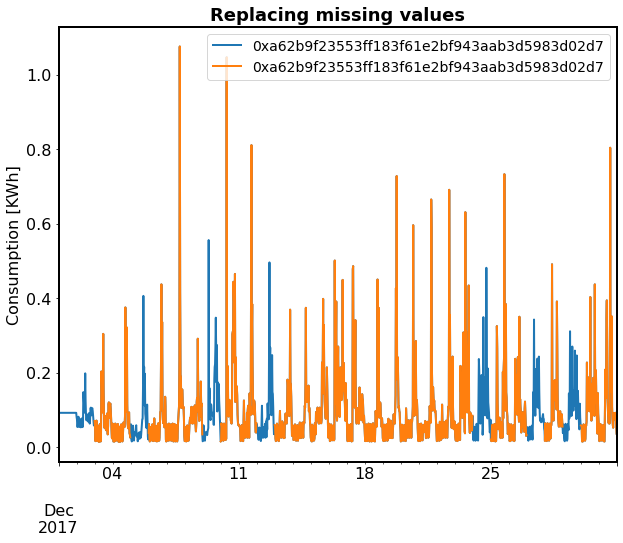

In [59]:
axis = figure_layout(figsize=(10,8),titel="Replacing missing values",xlabel="",ylabel="Consumption [KWh]",fontsize_titel=18,fontsize_axis=16,fontsize_legend=14,fontsize_ticks=16)
originalDecember_NM.iloc[:,0].plot(ax=axis,legend= "Replaced values")
originalDecember.iloc[:,0].plot(ax=axis,legend= "Missing values")
plt.show()

In [51]:
originalDecember_NM.isnull().sum(axis=0).sum()

0

## Correlatie

In [169]:
def figure_layout_axis(ax1 =axis,titel="",xlabel="",ylabel="",fontsize_titel=18,fontsize_axis=16,fontsize_legend=14,fontsize_ticks=16):
    plt.rc('legend',fontsize=fontsize_legend)
    ax.set_title(titel)
    plt.xlabel(xlabel, fontsize=fontsize_axis)
    plt.ylabel(ylabel, fontsize=fontsize_axis)
    for tick in ax1.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize_ticks)
    #         tick.label1.set_fontweight('bold')
    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize_ticks)
    #     tick.label1.set_fontweight('bold')
    
    return ax1

In [170]:
decemberConsumption = originalDecember_NM.sum(axis=0)

In [114]:


# ax = axes[0][0]
# ax.set_title("Dwelling Type")
# ax.scatter(['try','try','try'], [52,10,25])
# ax.scatter(['try2','try2','try2'], [52,10,25])

# plt.show()

In [212]:
def box_plot(axis,data,name_plot):
    bp = axis.boxplot(data,patch_artist=True)
    val = [item.get_ydata() for item in bp['medians']]
    print("medians:")
    print(val)
    # change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        box.set(color='#7570b3', linewidth=2)
        box.set(facecolor='#1b9e77')
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)
    axis.set_xticklabels(name_plot)

In [213]:
# def box_plot(axis,data,name_plot):
	
#     bp = axis.boxplot(data,patch_artist=True)
#     print("stijn")
#     ## change outline color, fill color and linewidth of the boxes
#     for box in bp['boxes']:
# 		# change outline color
# 		box.set(color='#7570b3', linewidth=2)
# 		# change fill color
# 		box.set(facecolor='#1b9e77')

#     ## change color and linewidth of the whiskers
#     for whisker in bp['whiskers']:
#         whisker.set(color='#7570b3', linewidth=2)

#     ## change color and linewidth of the caps
#     for cap in bp['caps']:
# 		cap.set(color='#7570b3', linewidth=2)

# 	## change color and linewidth of the medians
#     for median in bp['medians']:
#         median.set(color='#b2df8a', linewidth=2)

# 	## change the style of fliers and their fill
#     for flier in bp['fliers']:
#         flier.set(marker='o', color='#e7298a', alpha=0.5)
#     axis.set_xticklabels(name_plot)


### Dwelling type

In [214]:
def plot_samples(column_name = "dwelling_type", titel = "Dwelling Type", list_var =  ["flat","bungalow","detached_house","semi_detached_house","terraced_house"],size = (18,8)):
    # (_,axes) = plt.subplots(2,3)
    ax = figure_layout(figsize=size,titel=titel,ylabel="Monthly Consumption [kWh]")
    # ax = axes[0][0]
    # ax.set_title()
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    i = 0
    for typ in list_var:      
        names = attributes.index[np.array(attributes.loc[:,column_name]) == typ].values
        for meter_name in names:
            ax.scatter(typ,decemberConsumption.loc[meter_name],c=colors[i])
        i = i +1
    plt.show()

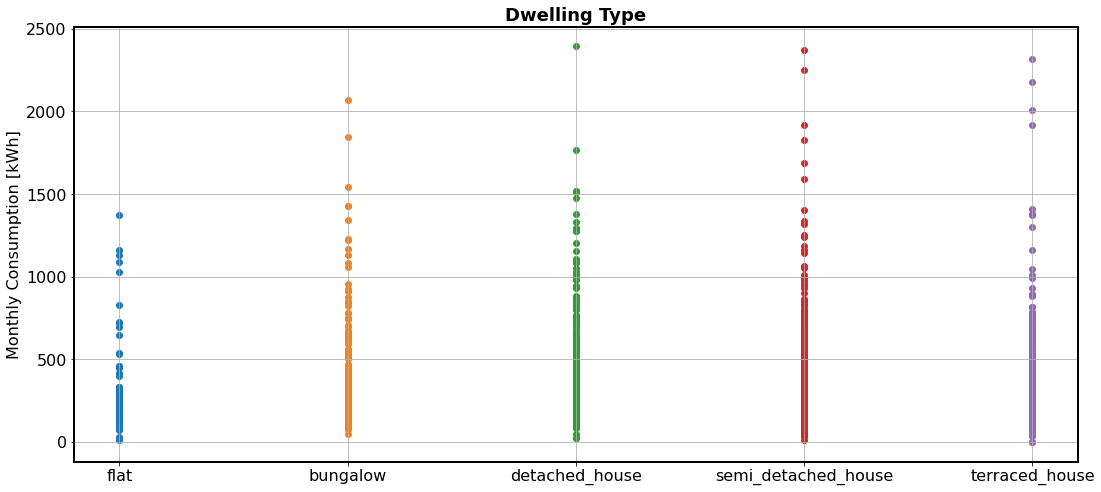

In [215]:
plot_samples()

In [227]:
def new_box_plot(data = [[],[],[],[],[]],column_name = 'dwelling_type', name_plot = ["flat","bungalow","detached_house","semi_detached_house","terraced_house"],titel = "Dwelling Type",list_var = ["flat","bungalow","detached_house","semi_detached_house","terraced_house"],lim=1000,size = (18,8)):  
    new_ax = figure_layout(figsize=size,titel=titel,ylabel="Monthly Consumption [kWh]")
    i = 0
    for typ in list_var:   
        names = attributes.index[np.array(attributes.loc[:,column_name]) == typ].values
        for meter_name in names:
            con = decemberConsumption.loc[meter_name]
            data[i].insert(0,con)
        i = i + 1
    new_ax.set_ylim([0,lim])
    p = np.array(data).mean(axis=1)
    print("means: %s"%(p))
    box_plot(axis = new_ax,data= data,name_plot=name_plot)

In [228]:
new_box_plot()

IndexError: tuple index out of range

### Nr. occupants

### Nr. bedrooms

### Heating fuel

### Hot water fuel

### Boiler age

### Loft insulation

### Wall insulation

### Heating temperature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9CBB6F400>,
      dtype=object)

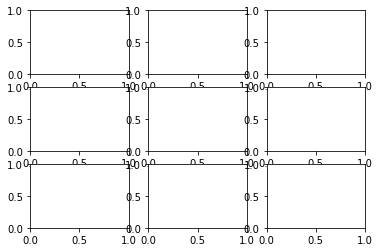

In [11]:
(_,axes) = plt.subplots(3,3)
